Install & Import Libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Load the Data


In [6]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")


**Check the first few rows:**

In [7]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

**Clean the Data**

In [9]:
df.columns = [c.strip().lower() for c in df.columns]

In [10]:
df = df.dropna(subset=["price", "room type", "neighbourhood group"])

In [11]:
num_cols = ["price", "service fee", "construction year",
            "review rate number", "calculated host listings count", "availability 365"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

Analysis & Visualizations
(a) Number of listings by neighbourhood group **bold text**

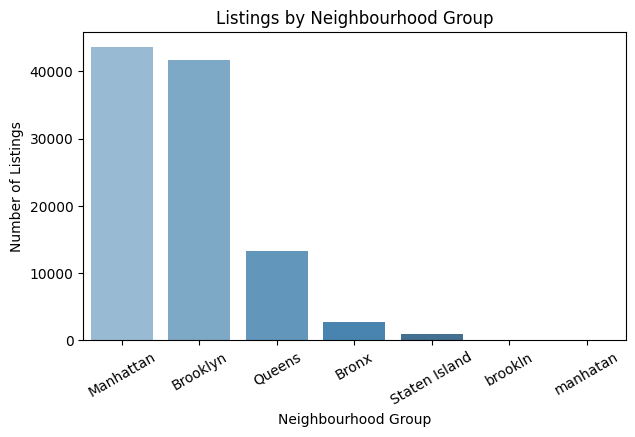

In [12]:
counts = df.groupby("neighbourhood group").size().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=30)
plt.show()


**(b) Average price by neighbourhood group**

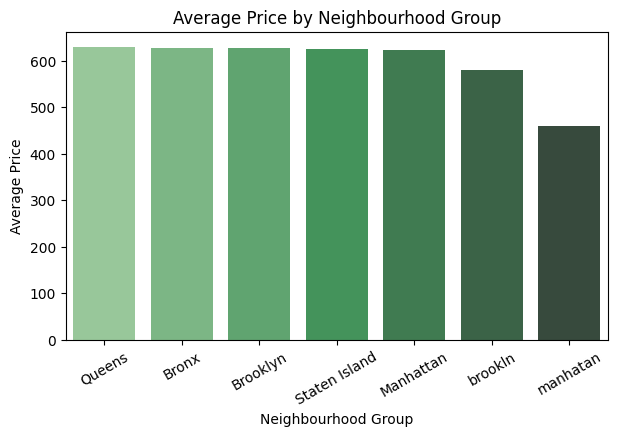

In [13]:
avg_price = df.groupby("neighbourhood group")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=avg_price.index, y=avg_price.values, palette="Greens_d")
plt.title("Average Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.xticks(rotation=30)
plt.show()


**(c) Price vs construction year**

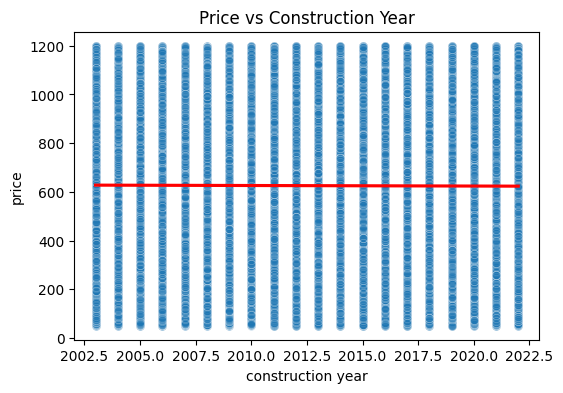

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="construction year", y="price", alpha=0.3)
sns.regplot(data=df, x="construction year", y="price", scatter=False, color="red")
plt.title("Price vs Construction Year")
plt.show()


**(d) Heatmap of review ratings by room type**

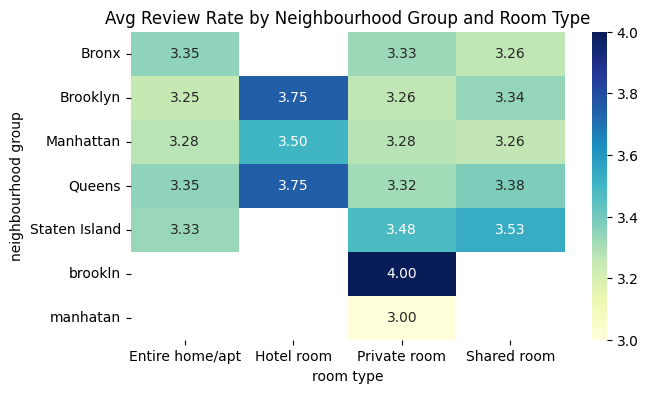

In [15]:
pivot_rt = df.pivot_table(index="neighbourhood group",
                          columns="room type",
                          values="review rate number",
                          aggfunc="mean")

plt.figure(figsize=(7,4))
sns.heatmap(pivot_rt, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Avg Review Rate by Neighbourhood Group and Room Type")
plt.show()


In [17]:
print(df.columns)


Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


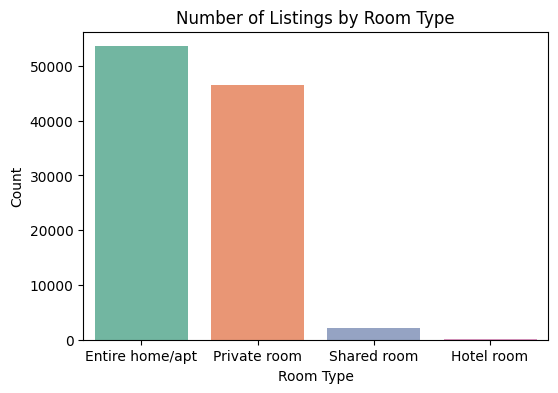

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="room type", order=df["room type"].value_counts().index, palette="Set2")
plt.title("Number of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()


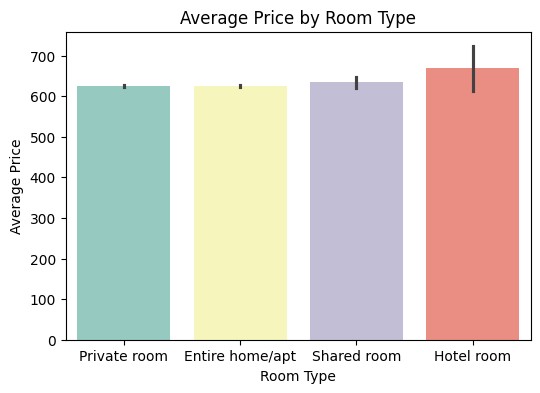

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="room type", y="price", estimator=lambda x: sum(x)/len(x), palette="Set3")
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()